# One-to-one correspondence between Dyck paths and full binary trees 

A *Dyck path* of length $2n$ is a path consisting of $n$ up steps ```'U'``` along $(1,1)$ and $n$ down steps ```'D'``` along $(1,-1)$ that starts at the origin $(0,0)$, ends at $(2n,0)$ and never goes below the x-axis (i.e., it stays in the first quadrant). A Dyck path can therefore expressed as a Dyck code. For example, one possible Dyck path of length $6$ is ```'UDUUDD'```.

Notice that a Dyck code is the same thing as an allowable parenthesization by replacing ```'U'``` and ```'D'``` by ```'('``` and ```')'```, for example, ```'UDUUDD'``` is ```'()(())'```.
.  

A full binary tree of $n$ internal nodes is a binary tree where each node has either two children (internal nodes) or no children (leaves). For example, here is a full binary tree of $3$ internal nodes:
<svg width="400" height="170">
  <rect x="0" y="0" width="100%" height="100%" fill="#fff"/>
  <line x1="50%" y1="20" x2="35%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="20" x2="65%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="65%" y1="60" x2="50%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="65%" y1="60" x2="80%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="35%" y2="140" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="65%" y2="140" stroke="#000" stroke-width="2"/>
  <circle cx="50%" cy="20" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="50%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="80%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
</svg>

The *one-to-one correspondence* between Dyck codes and full binary trees are given by the *tree preorder traversal*:
- Given a full binary tree, preparing a recording string ```visitingRecord``` and starting from the root node, we visit all the nodes by the following algorithm:

```python
    
def preorder(node,visitingRecord):        
    if node.left:              
        visitingRecord += 'L'
        visitingRecord = preorder(node.left,visitingRecord)
        visitingRecord += 'R'
        visitingRecord = preorder(node.right,visitingRecord)
    return visitingRecord 
print(preorder(rootNode,''))

    
```
  The final record after the whole process will be a sequence like ```visitingRecord = 'LRLLRR'```, which is a Dyck code by the easy observations that,
     * One must visit the left child before visiting the right child in a full binary tree
     * One must visit the right child after visiting the left child in a full binary tree
- Given a Dyck code like ```DyckCode = 'LRLLRR'```, one can easily reconstruct the corresponding full binary tree preorderly:

```python

def preorderCreate(DyckCode):
    if DyckCode:
        if DyckCode[0] == 'L':
            leftNode,restCode = preorderCreate(DyckCode[1:])
            rightNode,restCode = preorderCreate(restCode[1:])
            return TreeNode(leftNode,rightNode), restCode
        else:
            return TreeNode(),DyckCode
    else:
        return TreeNode(),''
print(preorderCreate(DyckCode)[0])

    
```
    
    



Button(description='Random Dyck code', style=ButtonStyle())

Output()

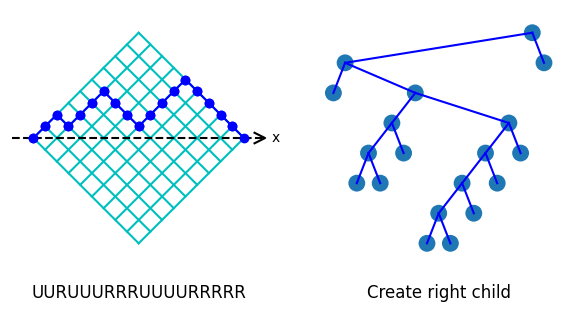

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from IPython.display import display,clear_output
import ipywidgets as widgets
import time

class DyckPath:
    def __init__(self, path : np.ndarray = np.array([])):
        self.path = path

    def __str__(self):
        return str(self.path)
    
    def toCode(self):
        last = 0
        code = []
        for pos in self.path:
            code.append(pos-last)
            last = pos
        return DyckCode(np.array(code))


class DyckCode:
    def __init__(self, code : np.ndarray = np.array([])):
        self.code = code

    def __str__(self):
        return str(self.code)

    def toPath(self):
        last = 0
        path = []
        for move in self.code:
            path.append(move+last)
            last = path[-1]
        return DyckPath(np.array(path))

    @staticmethod
    def randomCode(length = 0):
        code = []
        pos,neg,check = 0,0,0
        for _ in range(length << 1):
            if check == 0:
                seed = 1
                check += 1
            else:
                seed = random.randint(0,1)
                check += (seed << 1) - 1
            if seed:
                pos += 1
                code.append(1)
                if pos == length:
                    code = code + [-1] * (length - neg)
                    break
            else:
                neg += 1
                code.append(-1)
                if neg == length:
                    code = code + [1] * (length - pos)
        return DyckCode(np.array(code))
    
def dyckPathFullBinaryTreeCor(change):
    l = random.randint(1,10)
    code = DyckCode.randomCode(l)
    path = code.toPath()
    dyckCode_UR = ''.join([{1:'U',-1:'R'}[d] for d in code.code])
    with output_widget:
        fig = plt.figure(figsize=(6, 3), layout="constrained")
        axs = fig.subplots(1, 2)
        for ax in axs:
            ax.set_xlim(-2,2*l+2)
            ax.set_ylim(-l-2,l+2)
        for _ in range(l+1):
            axs[0].plot(np.arange(0,l+1,1) + _,np.arange(0,l+1,1) - _,'c')
            axs[0].plot(np.arange(0,l+1,1) + _,np.arange(0,-l-1,-1) + _,'c')
        
        plt.title(f"For Dyck code of length {2*l}: {dyckCode_UR}")
        axs[0].set_aspect('equal')
        axs[0].plot(np.array([-0.2*l,2.2*l]),np.array([0,0]),'k--')
        axs[0].plot(np.array([2.1*l,2.2*l,2.1*l]),np.array([-0.05*l,0,0.05*l]),'k')
        axs[0].text(2.3*l,0.1,'x',va= 'center',ha='center')
        axs[1].set_aspect('equal')
        axs[1].set_axis_off()
        axs[0].set_axis_off()
        axs[0].plot(np.array([0]),np.array([0]),'bo')
        
        depth = [0]
        par = {}
        stack = []
        inorder = []
        now = 0
        for key in dyckCode_UR:
            if key == 'U':
                depth.append(depth[now] + 1)
                stack.append(now)
                par[len(depth) - 1] = now
                now = len(depth) - 1
            else:
                inorder.append(now)
                now = stack.pop()
                inorder.append(now)
                depth.append(depth[now] + 1)
                par[len(depth) - 1] = now
                now = len(depth) - 1
        inorder.append(now)
        width = [-1] * (2 * l + 1)
        for k in range(2*l + 1):
            width[inorder[k]] = k
        vspace = 2 * l / max(depth)
        
        cir = patch.Circle((width[0],l),0.08*l)
        axs[1].add_artist(cir)
        
        clear_output(wait=True)
        display(fig)
        time.sleep(2)
        y = [0] + path.path.tolist()
        for x in range(1,2*l+1):
            axs[0].plot(np.array([x-1,x]),np.array([y[x-1],y[x]]),'b',marker='o')
            axs[0].set_title(dyckCode_UR[:x],y=-0.15)
            if dyckCode_UR[x-1] == 'U':
                axs[1].set_title('Create left child',y=-0.15)
            else:
                axs[1].set_title('Create right child',y=-0.15)
            cir = patch.Circle((width[x],l - vspace * depth[x]),0.08*l)
            x1 = par[x]
            axs[1].add_artist(cir)
            axs[1].plot(np.array([width[x],width[x1]]),np.array([l - vspace * depth[x],l - vspace * depth[x1]]),'b')
            clear_output(wait=True)
            display(fig)
            time.sleep(1)
            
        
    


button = widgets.Button(description="Random Dyck code")
output_widget = widgets.Output()

display(button)

button.on_click(dyckPathFullBinaryTreeCor)
display(output_widget)


        

## Algebraic version of this correspondence

A full binary tree of $n$ internal nodes determines the way of associating $n$ applications of a binary operator on ordered inputs of $n+1$ elements. For example,

<svg width="400" height="170">
    <style>
    .small {
      font: italic 13px sans-serif;
    }
    .heavy {
      font: bold 30px sans-serif;
    }
    .Rrrrr {
      font: italic 13px serif;
      fill: black;
    }
  </style>
  <rect x="0" y="0" width="100%" height="100%" fill="#fff"/>
  <line x1="50%" y1="20" x2="35%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="20" x2="65%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="65%" y1="60" x2="50%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="65%" y1="60" x2="80%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="35%" y2="140" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="65%" y2="140" stroke="#000" stroke-width="2"/>
  <circle cx="50%" cy="20" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="50%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="80%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <text x="34%" y="62" class="Rrrrr">a</text>
  <text x="79%" y="102" class="Rrrrr">d</text>
  <text x="34%" y="142" class="Rrrrr">b</text>
  <text x="64%" y="143" class="Rrrrr">c</text>
  
</svg>

is corresponding to $(a\otimes ((b\otimes c) \otimes d))$. Recall that we can always regard a binary operation as a morphsim from elements to morphisms between elements. To be explicitly,
$$
    a \mapsto (\{a\}:b\mapsto \{a\}b := a \otimes b).
$$
Using this idea, we can rewrite the above expression of binary operations with complete parenthesization by left operators as
$$
    (a\otimes ((b\otimes c) \otimes d)) = \{a\}\{\{b\}c\}d.
$$
We can even omit the input on the right half side, whick will give us ```'{}{{}}'```. Look, we recover the Dyck code!

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from IPython.display import display,clear_output
import ipywidgets as widgets
import time

class DyckPath:
    def __init__(self, path : np.ndarray = np.array([])):
        self.path = path

    def __str__(self):
        return str(self.path)
    
    def toCode(self):
        last = 0
        code = []
        for pos in self.path:
            code.append(pos-last)
            last = pos
        return DyckCode(np.array(code))


class DyckCode:
    def __init__(self, code : np.ndarray = np.array([])):
        self.code = code

    def __str__(self):
        return str(self.code)

    def toPath(self):
        last = 0
        path = []
        for move in self.code:
            path.append(move+last)
            last = path[-1]
        return DyckPath(np.array(path))

    @staticmethod
    def randomCode(length = 0):
        code = []
        pos,neg,check = 0,0,0
        for _ in range(length << 1):
            if check == 0:
                seed = 1
                check += 1
            else:
                seed = random.randint(0,1)
                check += (seed << 1) - 1
            if seed:
                pos += 1
                code.append(1)
                if pos == length:
                    code = code + [-1] * (length - neg)
                    break
            else:
                neg += 1
                code.append(-1)
                if neg == length:
                    code = code + [1] * (length - pos)
        return DyckCode(np.array(code))
    
def binaryOperations(change):
    l = random.randint(1,10)
    code = DyckCode.randomCode(l)
    path = code.toPath()
    dyckCode_UR = ''.join([{1:'U',-1:'R'}[d] for d in code.code])
    
    lis = []
    pos = 1
    def codeToBE(s):
        nonlocal pos
        if s and s[0] == 'U':
            lis.append('(')
            s = codeToBE(s[1:])
            lis.append('*')
            s = codeToBE(s[1:])
            lis.append(')')
            return s
        else:
            lis.append(str(pos))
            pos += 1
            return s
    codeToBE(dyckCode_UR)
    
    LE_str = ''
    count = 1
    for s in dyckCode_UR:
        if s == 'U':
            LE_str += '{'
        else:
            LE_str += str(count)+'}'
            count += 1
    LE_str += str(count)
    
    with output_widget1:
        print(f'The Dyck code is {dyckCode_UR}.')
        BE_str = ''.join(lis)
        print(f'The corresponding complete parenthesized expression for binary operations is {BE_str}.')
        print(f'The corresponding expression for left operators is {LE_str}.')
        


button1 = widgets.Button(description="Random Dyck code")
output_widget1 = widgets.Output()

display(button1)

button1.on_click(binaryOperations)
display(output_widget1)


        

Button(description='Random Dyck code', style=ButtonStyle())

Output()